# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Problem 

#### Part I - Analysis of the used car market
The aim of this analysis is to understand the used car market in the country and the different attributes that drive the car market (Odometer, Manufacturer, Title State etc)

#### Part II - Predictive Modeling of used car prices
The aim of this part is to predict the price of the used cars based on the various criteria provided in the data so that used car dealers can price their cars optimally.

To get a better understanding of the data to solve the business problem, the dataset is loaded to get a high level understanding of the data for business purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)

In [2]:
df = pd.read_csv('data/vehicles.csv')
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.columns.values

array(['id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'state'], dtype=object)

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Identify the important columns in the data
In this step, the important columns in the data are identified. It is vital to understand which attributes drive the price of a used car. Since there are many columns in the data such as Odometer, manufacturer, condition, fuel,type etc we need to understand which columns can be used effectively.

#### Identify Null Values in the data
In this step the distribution of null values across the dataset is identified. This gives a good idea of the completeness of the data and values that need replacement or dropping.

#### Identify distribution of important categorical attributes
Since the data has many categorical attribues, pandas can be used to gain an understanding of the distribution of these categorical attribues.

In [6]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
df.condition.value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [9]:
df.condition.value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [10]:
df.year.value_counts()

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: year, Length: 114, dtype: int64

In [11]:
df.drive.value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [12]:
df.region.value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.

#### Drop unnecessary columns
Several columns in the data such as VIN, id etc are not necessary for prediction purposes and can be dropped. Some columns such as "size" are primarily null and can also be dropped. 

#### Replace nulls by unknown
For other columns, the null values are replaced by "unknown" so that it is viable for modelling and prediction purposes.

#### Identify outliers and remove them from the data
Some of the columns such as Odometer and the target variable "price" have outliers which can be removed.

In [13]:
#drop the following columns
df.drop('VIN', axis=1, inplace=True)
df.drop('size', axis=1, inplace=True)
df.drop('paint_color', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [14]:
#Drop null rows manufacturer, year
df = df.dropna(how='any', subset=['manufacturer'])
df = df.dropna(how='any', subset=['year'])
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [15]:
df.drop(df[(df['price'] == 0)].index, inplace=True)

In [16]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer         0
model             4639
condition       145676
cylinders       153500
fuel              2167
odometer          2177
title_status      7274
transmission      1703
drive           113926
type             80332
state                0
dtype: int64

In [17]:
#Replace null's by Unknown
# model
df['model'].fillna('Unknown', inplace = True)
# condition
df['condition'].fillna('Unknown', inplace = True)
# fuel
df['fuel'].fillna('Unknown', inplace = True)
# transmission
df['transmission'].fillna('Unknown', inplace = True)
# drive
df['drive'].fillna('Unknown', inplace = True)
# type
df['type'].fillna('Unknown', inplace = True)
# cylinders
df['cylinders'].fillna('Unknown', inplace = True)
df['transmission'].fillna('other', inplace = True)
df['title_status'].fillna('Unknown', inplace = True)
#Drop null rows odometer
df = df.dropna(how='any', subset=['odometer'])
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
dtype: int64

In [18]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,Unknown,pickup,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,Unknown,pickup,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,Unknown,pickup,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,Unknown,pickup,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [19]:
df['price'].describe()

count    3.756190e+05
mean     8.378142e+04
std      1.298382e+07
min      1.000000e+00
25%      7.300000e+03
50%      1.549500e+04
75%      2.759000e+04
max      3.736929e+09
Name: price, dtype: float64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

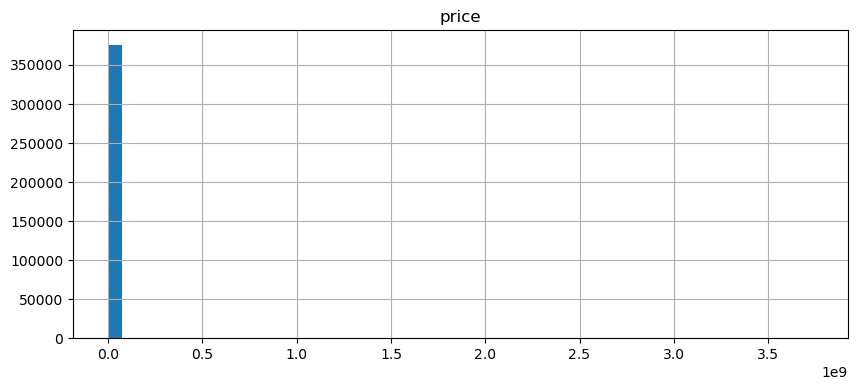

In [20]:
df.hist(column='price',bins=50,figsize=(10, 4))

array([[<Axes: title={'center': 'year'}>]], dtype=object)

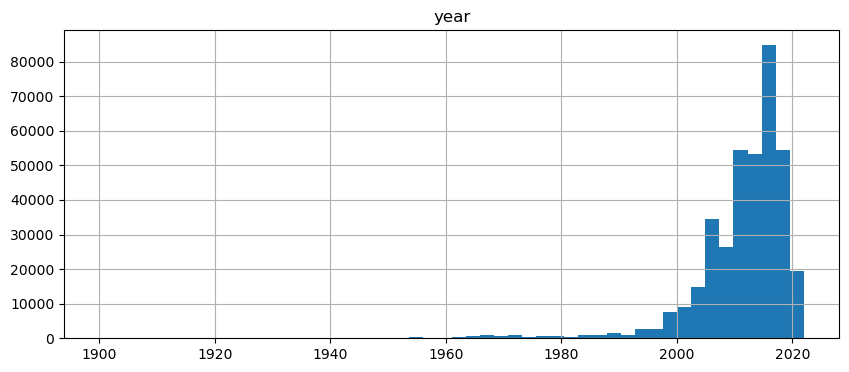

In [21]:
df.hist(column='year',bins=50,figsize=(10, 4))

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

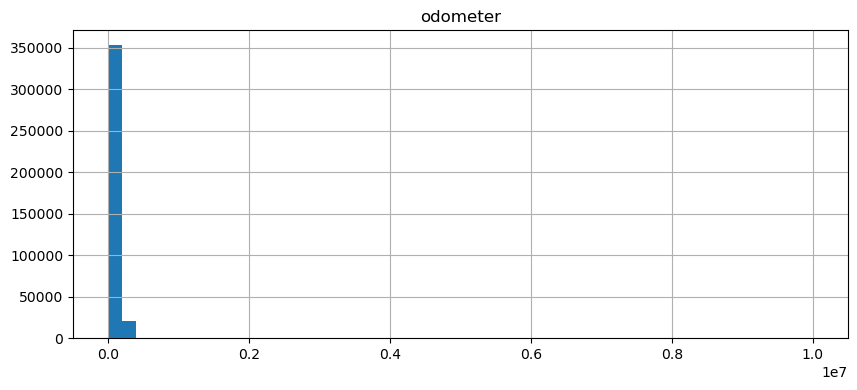

In [22]:
df.hist(column='odometer',bins=50,figsize=(10, 4))

array([[<Axes: title={'center': 'price'}>]], dtype=object)

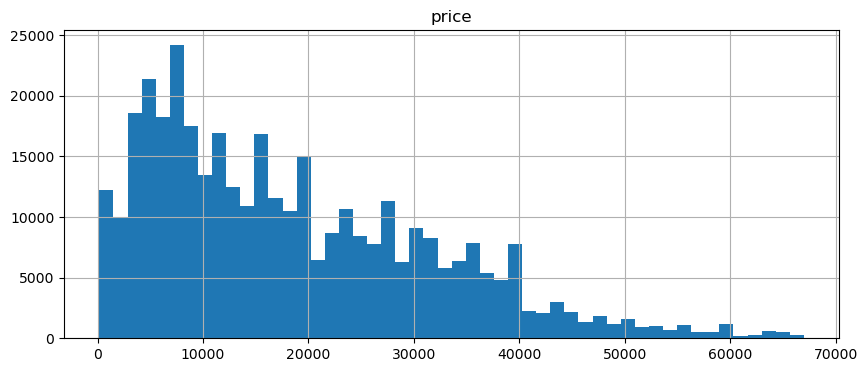

In [23]:
#Remove outliers
low = df["price"].quantile(0.01)
hi  = df["price"].quantile(0.99)
df = df[(df["price"] < hi) & (df["price"] > low)]
df.hist(column='price',bins=50,figsize=(10, 4))

array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

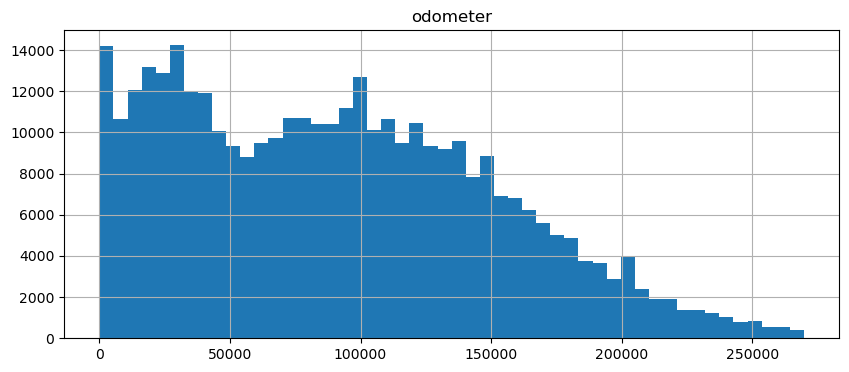

In [24]:
#Remove outliers
low = df["odometer"].quantile(0.01)
hi  = df["odometer"].quantile(0.99)
df = df[(df["odometer"] < hi) & (df["price"] > low)]
df.hist(column='odometer',bins=50,figsize=(10, 4))

In [25]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,Unknown,pickup,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,Unknown,pickup,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,Unknown,pickup,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,Unknown,pickup,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [26]:
df['price'].describe()

count    364414.000000
mean      18486.742460
std       13276.748105
min         170.000000
25%        7500.000000
50%       15590.000000
75%       27401.750000
max       66992.000000
Name: price, dtype: float64

In [27]:
df['odometer'].describe()

count    364414.000000
mean      91323.000417
std       60220.122503
min           0.000000
25%       38795.750000
50%       87200.000000
75%      134166.000000
max      269700.000000
Name: odometer, dtype: float64

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models. Here, you should build a number of different regression models with the price as the target. In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Create a linear regression model with label encoding for the categorical features
Initially, a linear regression model is created. The categorical columns are encoded using label encoding. 

#### Create a linear regression model with target encoder for the categorical features
Next, a linear regression model is created but in this case the categorical columns are encoded using target encoding.

#### Perform hyperparameter tuning and cross validation and create a better model
In the final step, hyperparameter tuning and cross validation is performed to arrive at a better model for prediction.

#### Track the performance of each model to select the best possible model
For each of these models, the model metrics are stored in a dataframe called ModelComparison so that we can eventually identify the best model.

In [28]:
df_original = df.copy()

In [29]:
#Label Encode Categorical columns
categorical_cols = ['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','state']
LabelEncoding=preprocessing.LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(LabelEncoding.fit_transform)

In [30]:
X = df[['odometer','year','region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','state']]
y = np.log1p(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [31]:
#Perform Linear Regression, add results to ModelComparison dataframe
def PredictionResults(y_test,y_pred):
    resultlist=[]
    resultlist.append(mean_squared_log_error(y_test, y_pred))
    resultlist.append(np.sqrt(resultlist[0]))
    resultlist.append(r2_score(y_test,y_pred))
    resultlist.append(round(r2_score(y_test,y_pred)*100,4))
    return (resultlist)

ModelComparison = pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy Percent'])
SimpleLinear = LinearRegression()
SimpleLinear.fit(X_train,y_train)
y_pred=SimpleLinear.predict(X_test)
RegressionResult = PredictionResults(y_test,y_pred)
print('Coefficients: \n', SimpleLinear.coef_)
print("Mean Squared Log Error : " + str(RegressionResult[0]))
print("Root Mean Squared Log Error : " + str(RegressionResult[1]))
print("R2 Score : " + str(RegressionResult[2]) + " or " + str(RegressionResult[3]) + "%")
ModelComparison['Linear Regression Label Encoding'] = RegressionResult

Coefficients: 
 [-6.03708284e-06  2.14883808e-02 -2.75255444e-05 -2.67143676e-03
  3.96542072e-06 -7.20784519e-04  1.05424770e-01 -1.55067765e-01
 -5.41725224e-02  1.36910962e-01 -1.06304215e-01  1.62731301e-02
 -9.55173243e-04]
Mean Squared Log Error : 0.007090469094010766
Root Mean Squared Log Error : 0.08420492321717754
R2 Score : 0.3410407486626308 or 34.1041%


In [32]:
ModelComparison

,Linear Regression Label Encoding
MSLE,0.007090
Root MSLE,0.084205
R2 Score,0.341041
Accuracy Percent,34.104100


In [33]:
df = df_original

In [34]:
#Use TargetEncoder instead of label Encoder
X = df.drop('price', axis = 1)
y = np.log1p(df['price'])
te = TargetEncoder()
# Fit the TargetEncoder to the data
te.fit(X, y)
# Transform the data
X_Encoded = te.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size=0.3, random_state = 42)

In [35]:
SimpleLinear = LinearRegression()
SimpleLinear.fit(X_train,y_train)
y_pred=SimpleLinear.predict(X_test)
RegressionResult = PredictionResults(y_test,y_pred)
print('Coefficients: \n', SimpleLinear.coef_)
print("Mean Squared Log Error : " + str(RegressionResult[0]))
print("Root Mean Squared Log Error : " + str(RegressionResult[1]))
print("R2 Score : " + str(RegressionResult[2]) + " or " + str(RegressionResult[3]) + "%")
ModelComparison['Linear Regression Target Encoding'] = RegressionResult

Coefficients: 
 [ 0.18214539  0.19206471  0.01951518  0.38009894  0.16998327  0.10693472
  0.0716514   0.73094779  0.33546505 -0.2913202   0.12907375  0.03032243
  0.06155126]
Mean Squared Log Error : 0.0028070961619280892
Root Mean Squared Log Error : 0.05298203621915724
R2 Score : 0.7536033132407137 or 75.3603%


In [36]:
ModelComparison

,Linear Regression Label Encoding,Linear Regression Target Encoding
MSLE,0.007090,0.002807
Root MSLE,0.084205,0.052982
R2 Score,0.341041,0.753603
Accuracy Percent,34.104100,75.360300


In [37]:
alphas = [.1, .5, 1, 3, 6, .1, .5, 1, 3, 6, .1, .5, 1, 3, 6] 
degree = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
kfolds = KFold(n_splits = 15)
models = [None] * 15
scores = [None] * 15
i = 0
for train_i, test_i in kfolds.split(X, y):
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]
    targetencoder = TargetEncoder()
    targetencoder.fit(X_train, y_train)
    X_train = te.transform(X_train)
    targetencoder.fit(X_test, y_test)
    X_test = targetencoder.transform(X_test)
    poly = PolynomialFeatures(degree = degree[i])
    scaler = StandardScaler()
    poly.fit(X_train, y_train)
    X_train = poly.transform(X_train)
    X_test = poly.transform(X_test)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    models[i] = Ridge(alpha = alphas[i])
    models[i].fit(X_train, y_train)
    scores[i] = models[i].score(X_test, y_test)
    i += 1
        
best_ridge_model = models[scores.index(max(scores))]
print ("Done with hyperparameter tuning and KFold cross validation, best Ridge model selected")

Done with hyperparameter tuning and KFold cross validation, best Ridge model selected


# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client

#### Model Evaluation and Selection
The three models that were vuilt will now be compared using the "ModelComparison" dataframe. It appears that after hyperparameter tuing and cross validation, a ridge regression model with an accuracy percentage of almost 90% is a resonable choice for a model to use for used car price predictions.

In [43]:
best_ridge_model

Ridge(alpha=0.5)

In [44]:
best_ridge_model.n_features_in_

560

In [45]:
X_train, X_test = X.iloc[train_i], X.iloc[test_i]
y_train, y_test = y.iloc[train_i], y.iloc[test_i]
te = TargetEncoder()
te.fit(X_train, y_train)
X_train = te.transform(X_train)
te.fit(X_test, y_test)
X_test = te.transform(X_test)
poly = PolynomialFeatures(degree = 3)
scaler = StandardScaler()
poly.fit(X_train, y_train)
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
ridge_predictions = best_ridge_model.predict(X_test)
ridge_acc = metrics.mean_absolute_error(y_test, ridge_predictions)
print("Ridge Mean Absolute Error:", ridge_acc)
reg_RidgeRegression=PredictionResults(y_test,ridge_predictions)
print("MSLE : " + str(reg_RidgeRegression[0]))
print("Root MSLE : " + str(reg_RidgeRegression[1]))
print("R2 Score : "+str(reg_RidgeRegression[2]) +" or " + str(reg_RidgeRegression[3])+"%")
ModelComparison['Ridge Regression Target Encoding'] = reg_RidgeRegression

Ridge Mean Absolute Error: 0.22523490197647514
MSLE : 0.0015988593813274917
Root MSLE : 0.039985739724650485
R2 Score : 0.8972941239077107 or 89.7294%


In [47]:
ModelComparison

,Linear Regression Label Encoding,Linear Regression Target Encoding,Ridge Regression Target Encoding
MSLE,0.007090,0.002807,0.001599
Root MSLE,0.084205,0.052982,0.039986
R2 Score,0.341041,0.753603,0.897294
Accuracy Percent,34.104100,75.360300,89.729400


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Distribution by vehicle type, manufacturer and Odometer
Before the deployment of the model an analysis of the distribution by various attributes is performed to gain a good understanding of how the used car business can start getting new inventory into their lots.

#### Feature importance based on the prediction models
The regression models give deep inside into the features that are most important in predicting the prices and an analysis is performed to gather these features

#### Ridge regression model performance
Some charting is performed to show the actual versus predicted value for the prices that is gleaned from the model. This gives a good idea of the accuracy of the model.


In [48]:
df_original

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,Unknown,pickup,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,Unknown,pickup,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,Unknown,pickup,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,Unknown,pickup,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


Text(0, 0.5, 'Count')

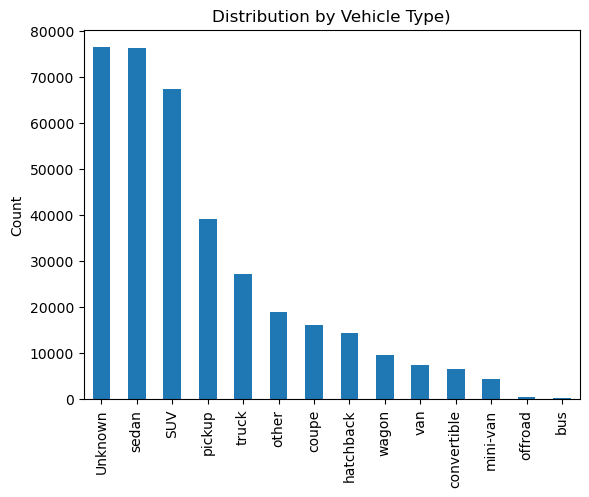

In [49]:
df_original.type.value_counts().plot(kind = 'bar')
plt.title('Distribution by Vehicle Type)')
plt.ylabel('Count')

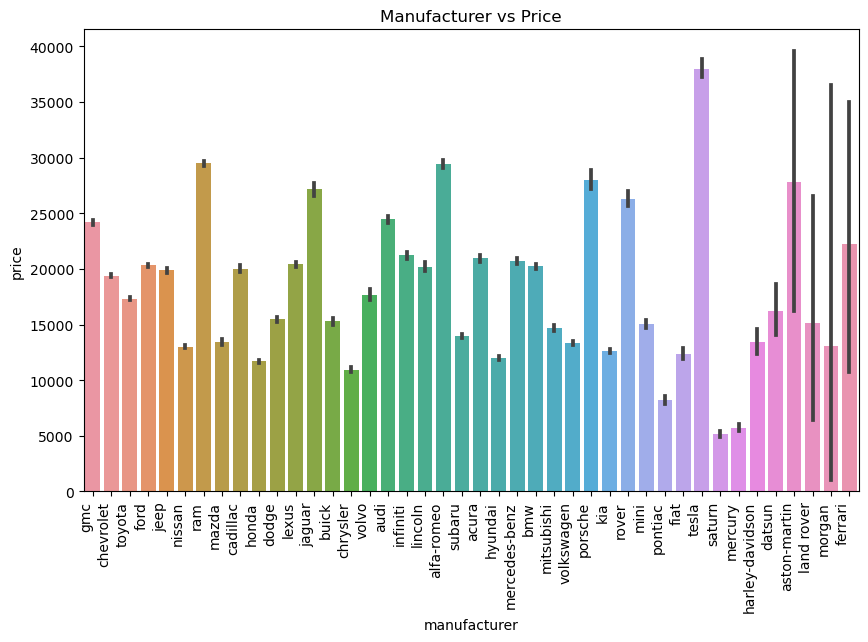

In [50]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=df_original);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
plt.title("Manufacturer vs Price");

Text(0, 0.5, 'mileage [miles]')

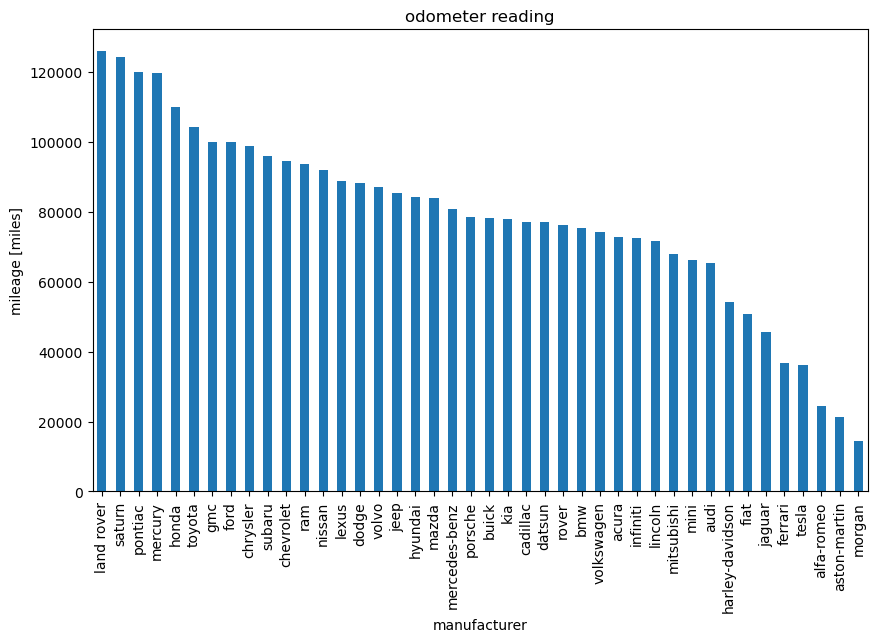

In [51]:
grouping_brand_odom = df_original.groupby('manufacturer')['odometer'].mean().sort_values(ascending = False)
grouping_brand_odom.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('odometer reading')
plt.ylabel('mileage [miles]')

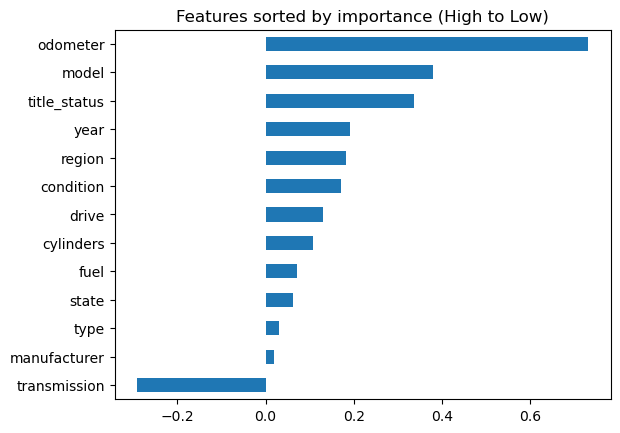

In [52]:
#Determine the important features from the regression analysis
SortedCoefficients = pd.Series(SimpleLinear.coef_, index = X.columns).sort_values()
SortedCoefficients.plot(kind = "barh")
plt.title("Features sorted by importance (High to Low)")
plt.show()

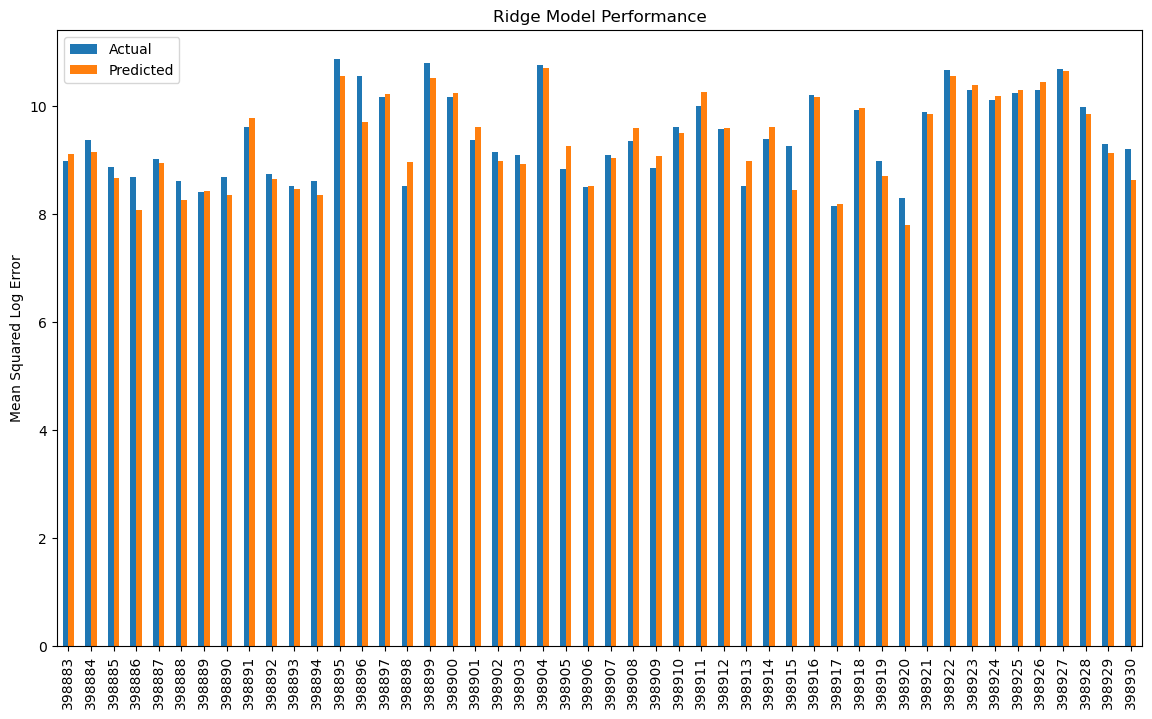

In [53]:
CheckAccuracy = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_predictions})
CheckAccuracy = CheckAccuracy.head(48)
CheckAccuracy.plot(kind='bar',figsize=(14,8))
plt.title('Ridge Model Performance')
plt.ylabel('Mean Squared Log Error')
plt.show()

### Business Recommendations and Conclusion
It is recommended that the used car business pay most attention to the following features of cars when stocking inventory.

##### Odometer Reading
Consumers are willing to pay a premium for lower odometer readings.

##### Vehicle Model
Consumers also like specialized models within a manufacturer. So, a model that is higher than a base model will be more desirable. 

##### Title Status
A clean title status will be valued by consumers.

##### Year
A lower model year is also very valuable.

##### Condition
Cars in good condition are priced higher.

#### Price Predictions
The model that was built and tested on the used car data can be used by used car retailers to price their inventory. Since the predictions of the model are almost 90% accurate, the used car business can use this ridge regression model to determine the best price to retail the car on the used car lot.